# Demand Forecating Optimization for inventory Management

## Introduction

Effective inventory management is crucial for retail businesses to minimize stockouts, reduce overstocking, and optimize ordering decisions. This project aims to enhance demand forecasting accuracy using historical sales data, seasonality, competitor pricing, promotions and weather conditions. The insights will support data driven procurement and inventory decisions to improve store efficiency and profitability.

## Objectives

1. Develop an advanced demand forecasting model usning machine learning techniques.

2. Identify key factors influencing demand fluctuations

3. Optimize Inventory levels to redue holding costs and prevent lost sales.

4. Provide actionable recommendations for procurement planning.


## Data Overview

The dataset includes the following key features:

* Inventory and Sales Data: Inventory levels units sold and units ordered
* Demand Forecating: Exixting forecasted demand values
* External Factors: Weather conditions, competitor pricing, Promotions and seasonality
* Product and Store Information: Product category, region and store ID

## Methododology

* Data Preprocessing: Handles missing values, normalize features and encode categorical variables
* Exploratory Data Analysis(EDA): Identify demand patterns, trends and seasonality
* Model development:
    * Compare models such as ARIMA, Random Forest, XGBoost and LSTMs
    * Evaluate model perfromacne using RSME, MAE, and MAPE

## Expected outcome:
* A predictie model with improved accuracy for demand forecating.

* Insights on how weather, promotions and competitor pricing impact sales

* A desion support tool for procuremetn teams to enhance inventory planning

* Reduced excess inventory and minimized stockouts, improving profitabilty

## Implementation Plan
* Data Exploration an preprocessing
* Model development and evaluation
* Optimization and actionable recommendations
* Deployment and reporting



# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\Catherine\Desktop\Project\Retail store inventory forecating dataset\Inventory forecasting\Demand-Forecasting-Optimization-for-Inventory-Management/retail_store_inventory.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [5]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
73095   2024-01-01
73096   2024-01-01
73097   2024-01-01
73098   2024-01-01
73099   2024-01-01
Name: Date, Length: 73100, dtype: datetime64[ns]

In [6]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [7]:
# Normalizate numerical features
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
numerical_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  float64       
 6   Units Sold          73100 non-null  float64       
 7   Units Ordered       73100 non-null  float64       
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [9]:
# Encode categorical variables
categorical_cols = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [10]:
# Remove outliers
from scipy.stats import zscore
df = df[(np.abs(zscore(df[numerical_cols])) < 3).all(axis=1)]

In [11]:
df.to_csv('cleaned_inventory_data.csv', index=False)

In [13]:
data = pd.read_csv(r'C:\Users\Catherine\Desktop\Project\Retail store inventory forecating dataset\Inventory forecasting\Demand-Forecasting-Optimization-for-Inventory-Management\cleaned_inventory_data.csv')
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,0,0,3,1,-0.334516,-0.086899,-1.052172,-0.055144,-0.831423,20,1,0,-0.971931,0
1,2022-01-01,0,1,4,2,-0.542290,0.124268,-0.841754,0.023297,0.302627,20,3,0,0.420520,0
2,2022-01-01,0,2,4,3,-1.327216,-0.656131,-1.128687,-0.617599,-1.043169,10,3,1,-0.909697,2
3,2022-01-01,0,3,4,1,1.496977,-0.692855,1.032872,-0.725971,-0.861398,10,0,1,-0.779119,0
4,2022-01-01,0,4,1,0,-0.834714,-1.124370,0.478135,-1.210350,0.711131,0,3,0,0.527044,2


# Exploratory Data Analysis

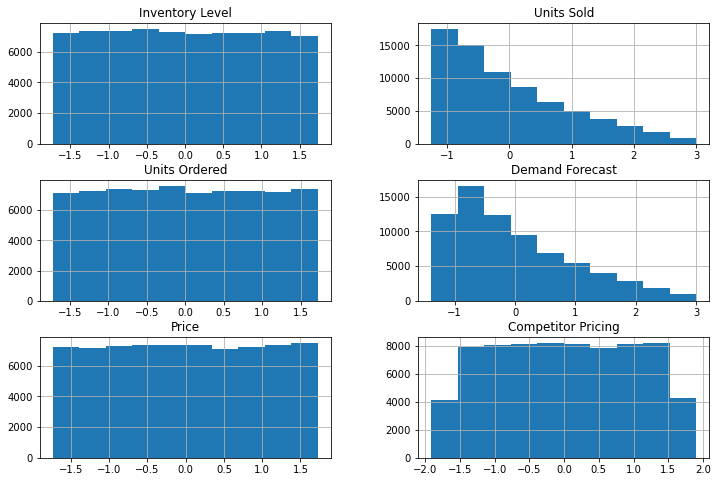

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distributionof numerical features
numerical_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']
df[numerical_cols].hist(figsize=(12, 8))
plt.show()

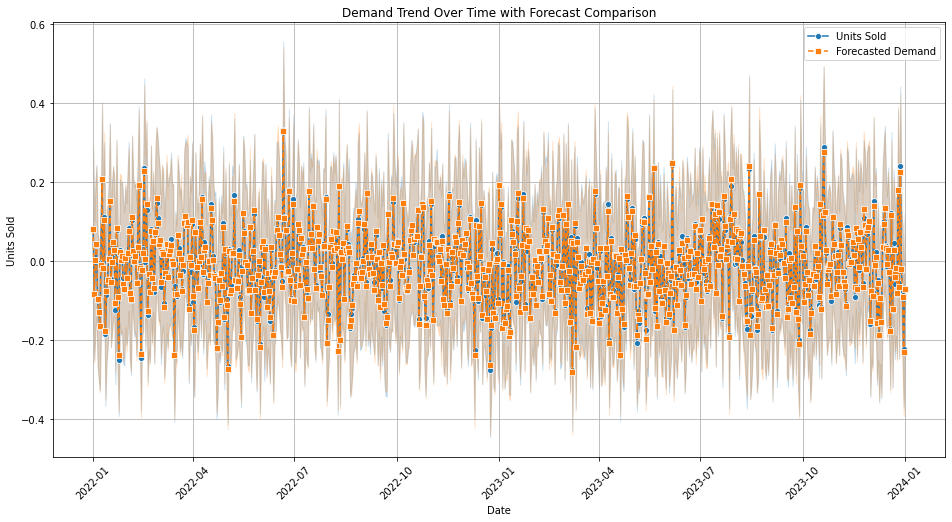

In [19]:
# Time series analysis of demand
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Date', y='Units Sold', label='Units Sold', marker='o')
sns.lineplot(data=df, x='Date', y='Demand Forecast', label='Forecasted Demand', linestyle='--', marker='s')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Demand Trend Over Time with Forecast Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()